In [65]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout
from keras.regularizers import l2
import os
import random
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
data_dir = 'D:\\ML\\FYP\\dataset'
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

In [23]:
batch_size = 32
img_size = (128, 128)
num_classes = 8

In [47]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range = 20,
    validation_split=0.3
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [48]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)

Found 9546 images belonging to 8 classes.


In [51]:
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  
)

Found 4086 images belonging to 8 classes.


In [27]:
class_names = list(train_generator.class_indices.keys())
print("Class Names:")
for class_name in class_names:
    print(class_name)

Class Names:
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___healthy


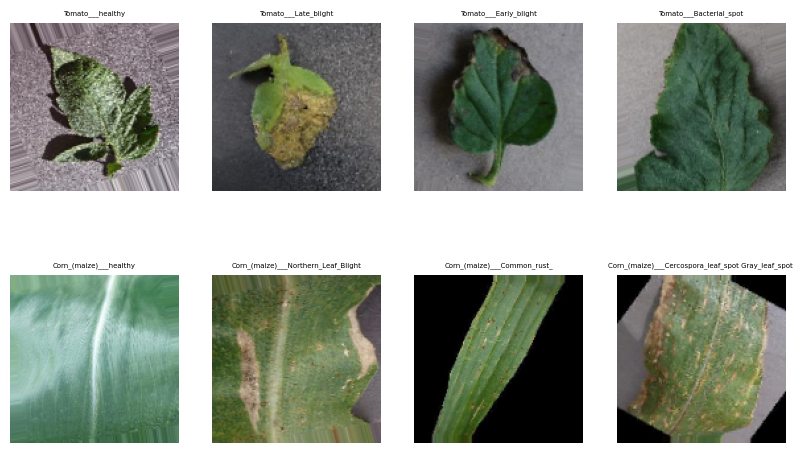

In [75]:
sample_images, sample_labels = next(train_generator)
unique_labels = np.unique(sample_labels, axis=0)
unique_indices = [np.where((sample_labels == label).all(axis=1))[0][0] for label in unique_labels]
plt.figure(figsize=(10, 6))
for i in range(len(class_names)):
    plt.subplot(2, 4, i+1)
    plt.imshow(sample_images[unique_indices][i])
    plt.title(class_names[np.argmax(unique_labels[i])],fontsize=5)
    plt.axis('off')
plt.show()


In [59]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3678 images belonging to 8 classes.


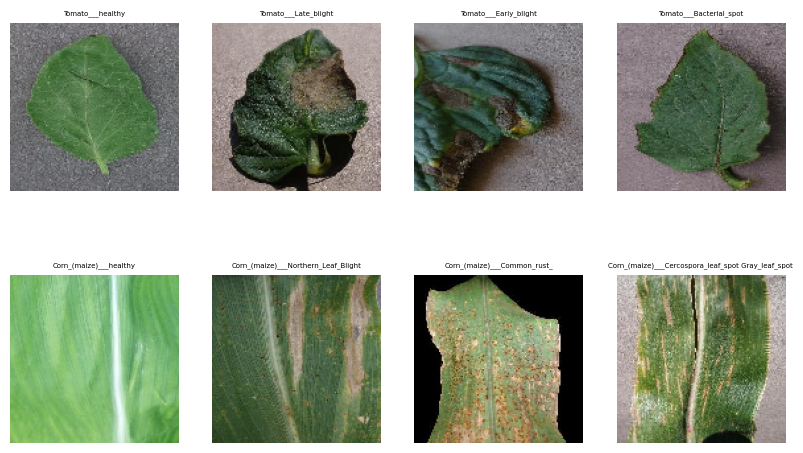

In [77]:
sample_images, sample_labels = next(test_generator)
unique_labels = np.unique(sample_labels, axis=0)
unique_indices = [np.where((sample_labels == label).all(axis=1))[0][0] for label in unique_labels]
plt.figure(figsize=(10, 6))
for i in range(len(class_names)):
    plt.subplot(2, 4, i+1)
    plt.imshow(sample_images[unique_indices][i])
    plt.title(class_names[np.argmax(unique_labels[i])],fontsize=5)
    plt.axis('off')
plt.show()

In [83]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.build()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 30, 30, 64)       

In [84]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])
epochs = 50

In [85]:
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator,verbose=1)

Epoch 1/50
299/299 [==============================] - 176s 583ms/step - loss: 1.6097 - accuracy: 0.3861 - val_loss: 1.3552 - val_accuracy: 0.5017
Epoch 2/50
299/299 [==============================] - 177s 590ms/step - loss: 1.0251 - accuracy: 0.6285 - val_loss: 0.7446 - val_accuracy: 0.7318
Epoch 3/50
299/299 [==============================] - 174s 583ms/step - loss: 0.7517 - accuracy: 0.7301 - val_loss: 0.5742 - val_accuracy: 0.8047
Epoch 4/50
299/299 [==============================] - 220s 737ms/step - loss: 0.6138 - accuracy: 0.7875 - val_loss: 0.4362 - val_accuracy: 0.8461
Epoch 5/50
299/299 [==============================] - 208s 697ms/step - loss: 0.5254 - accuracy: 0.8176 - val_loss: 0.3736 - val_accuracy: 0.8747
Epoch 6/50
299/299 [==============================] - 220s 734ms/step - loss: 0.4275 - accuracy: 0.8559 - val_loss: 0.3539 - val_accuracy: 0.8835
Epoch 7/50
299/299 [==============================] - 219s 732ms/step - loss: 0.4241 - accuracy: 0.8612 - val_loss: 0.3746 -

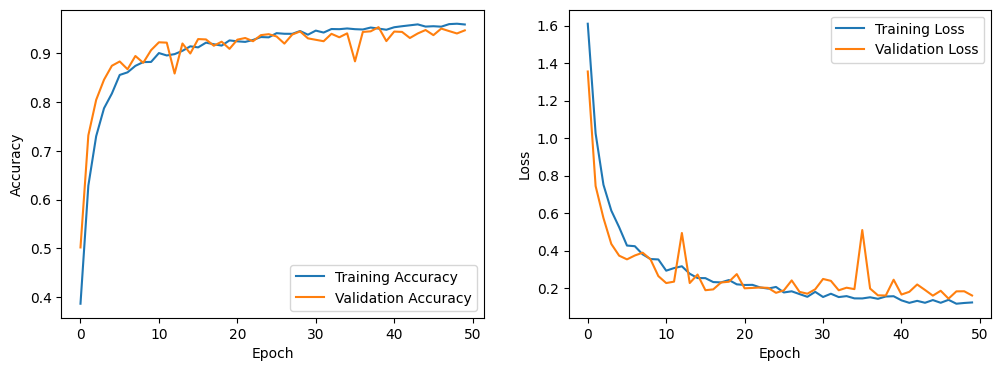

In [86]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [88]:
scores = model.evaluate(test_generator)

115/115 [==============================] - 14s 117ms/step - loss: 0.2660 - accuracy: 0.9244


1/1 [==============================] - 0s 209ms/step


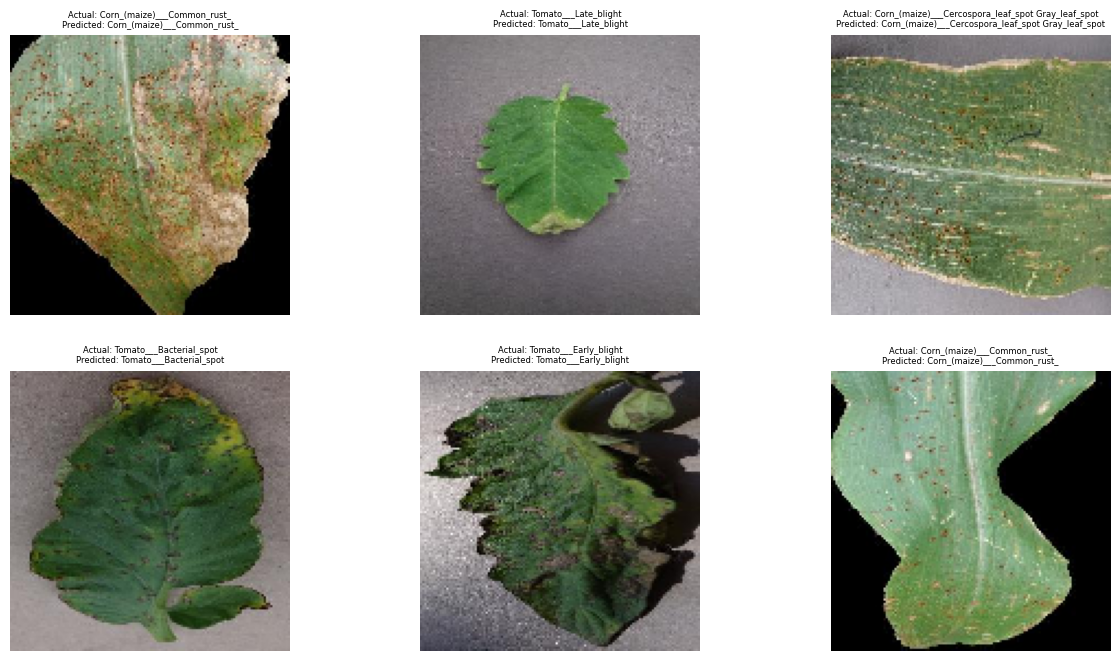

In [67]:
test_images, true_labels = next(test_generator)

predicted_probabilities = model.predict(test_images)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

true_labels = np.array(true_labels)

# Display six sample predictions
plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Actual: {class_names[np.argmax(true_labels[i])]}\nPredicted: {class_names[predicted_labels[i]]}", fontsize= 6)
    plt.axis('off')

plt.show()


In [90]:
model.save('final_model.h5')